In [26]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from datetime import datetime

warnings.simplefilter('ignore')

**Single Exponential Smoothing**

In [27]:
# Importing the dataset
data = pd.read_csv('D2.csv')

In [28]:
#Defining Single Exponential Smoothing function ses
def ses(arr,alpha):
    arr1 = [arr[0]]
    for i in range(1, len(arr)):
        arr1.append(alpha * arr[i-1] + (1 - alpha) * arr1[i-1])
    return arr1

In [29]:
#Defining Mean of Squared Error Function mse
def mse(arr1,arr2):
  arr3=[0]
  for i, j in zip(arr1, arr2):
    arr3.append(i-j)
  Sum=0
  for i in arr3:
    sqr=i**2
    Sum+=sqr
  mse=Sum/(len(arr2)-1)
  return mse

In [30]:
#Function to make list of demand with interval 'n'
def dem_n(arr,n):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%n==0:  
      arr1.append(arr[i])
  return arr1

In [31]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [32]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [33]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  8698.861149558394
Mean of Square Errors for alpha = 0.5 is:  7001.245732106936
Mean of Square Errors for alpha = 0.8 is:  8880.660902334475


alpha:  0.5


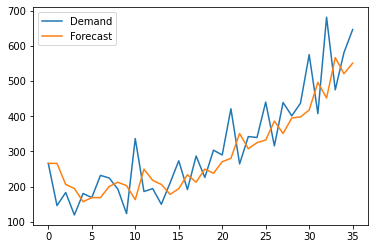

In [34]:
#Comparing mse and plotting for least mse
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

**Double Exponential Smoothing**

In [35]:
#Defining Double Exponential Smoothing function des
def des(arr,alpha,beta):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  arr1.append(a[0]+b[0])
  for i in range(1,len(arr)-1):
      a.append(alpha * arr[i] + (1 - alpha) * (a[i-1]+b[i-1]))
      b.append(beta * (a[i]-a[i-1]) + (1 - beta) * (b[i-1]))        
      arr1.append(a[i]+b[i])
  return arr1

In [36]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [37]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [38]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  5654.4471403397865
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  8150.740235092144
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  17610.337587153404


alpha:  0.2
beta:  0.3


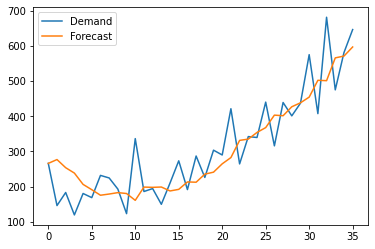

In [39]:
#Comparing mse and plotting for least mse
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

**Triple Exponential Smoothing**

In [40]:
#Defining initial trend
def initial_trend(arr, slen):
    Sum = 0
    for i in range(slen):
        Sum += float(arr[i+slen] - arr[i]) / slen
    return Sum / slen

In [41]:
#Defining initial seasonal
def initial_seasonal(arr, slen):
    arr1 = {}
    s_avg = []
    m = int(len(arr)/slen)
    for j in range(m):
        s_avg.append(sum(arr[slen*j:slen*j+slen])/float(slen))
    for i in range(slen):
        Sum = 0
        for j in range(m):
            Sum += arr[slen*j+i]-s_avg[j]
        arr1[i] = Sum/m
    return arr1

In [42]:
#Defining Triple Exponential Smoothing function tes with interval 'n'
def tes(arr, slen, alpha, beta, gamma, n):
    arr1 = []
    seasonals = initial_seasonal(arr, slen)
    for i in range(len(arr)+n):
        if i == 0:
            smooth = arr[0]
            trend = initial_trend(arr, slen)
            arr1.append(arr[0])
            continue
        if i >= len(arr):
            m = i - len(arr) + 1
            arr1.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = arr[i]
            lsmooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-lsmooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            arr1.append(smooth+trend+seasonals[i%slen])
    return arr1

In [43]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [44]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 12 months here

forecast_d2_tes_1=tes(demand,12,alpha1,beta1,gamma1,0)
forecast_d2_tes_2=tes(demand,12,alpha2,beta2,gamma2,0)
forecast_d2_tes_3=tes(demand,12,alpha3,beta3,gamma3,0)

In [45]:
#Calculating mean of sqaured errors
mse_d2_tes_1=mean_squared_error(demand,forecast_d2_tes_1)
mse_d2_tes_2=mean_squared_error(demand,forecast_d2_tes_2)
mse_d2_tes_3=mean_squared_error(demand,forecast_d2_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d2_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d2_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d2_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  1705.5940793672862
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  527.7554251944694
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  3940.441345408781


alpha:  0.5
beta:  0.6
gamma:  0.7


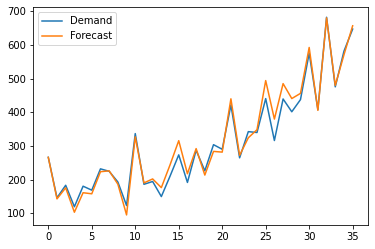

In [46]:
#Comparing mse and plotting for least mse
d2_tes_1={'Demand':demand,'Forecast':forecast_d2_tes_1}
d2_tes_2={'Demand':demand,'Forecast':forecast_d2_tes_2}
d2_tes_3={'Demand':demand,'Forecast':forecast_d2_tes_3}

df1=pd.DataFrame(d2_tes_1)
df2=pd.DataFrame(d2_tes_2)
df3=pd.DataFrame(d2_tes_3)

if mse_d2_tes_1<=mse_d2_tes_2 and mse_d2_tes_1<=mse_d2_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d2_tes_2<=mse_d2_tes_1 and mse_d2_tes_2<=mse_d2_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])



---

---

---







**Applying KPSS and ADF test**

1. ADF test

In [49]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = data[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Sales of shampoo over a three year period')

Results of Dickey-Fuller Test for  Sales of shampoo over a three year period 

Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


2. KPSS test

In [51]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(atr):
    timeseries = data[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Sales of shampoo over a three year period')

Results of KPSS Test for  Sales of shampoo over a three year period
Test Statistic            0.439388
p-value                   0.060178
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


For ADF test, we can see that the p-value  is 1.000000, which is more than 0.05. Thus, from ADF test, we can say that the dataset is non-stationary.

For KPSS test, Test Statistic is less than most Critical Values, thus we fail to reject the null hypothesis. Thus, from KPSS test, we can say that the dataset is stationary.

Since, ADF test gives non-stationary and KPSS test gives stationary, therefore, the dataset is concluded as Trend Stationary.



---

---

---







**Prediction for Intervals**

For Single Exponential Smoothening



1. For interval of 1 month

In [52]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [53]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [54]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  8698.861149558394
Mean of Square Errors for alpha = 0.5 is:  7001.245732106936
Mean of Square Errors for alpha = 0.8 is:  8880.660902334475


alpha:  0.5


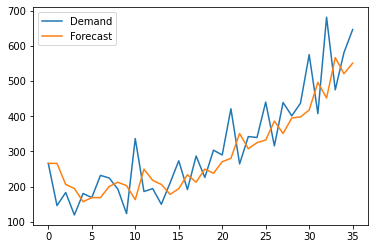

In [55]:
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

2. For interval of 2 month

In [56]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],2)

In [57]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [58]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  15278.186518185532
Mean of Square Errors for alpha = 0.5 is:  8468.1638298225
Mean of Square Errors for alpha = 0.8 is:  6880.77763710381


alpha:  0.8


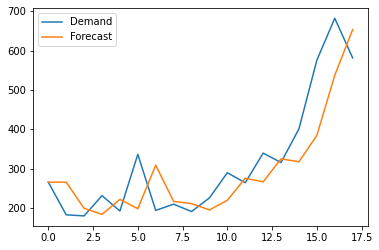

In [59]:
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

3. For interval of 4 month

In [60]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],4)

In [61]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [62]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  23112.27919948978
Mean of Square Errors for alpha = 0.5 is:  16821.34433681912
Mean of Square Errors for alpha = 0.8 is:  12774.84192750033


alpha:  0.8


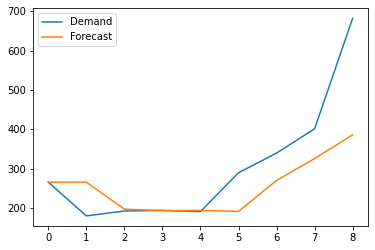

In [63]:
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

4. For interval of 8 month

In [64]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],8)

In [65]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [66]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  39516.327625472
Mean of Square Errors for alpha = 0.5 is:  37825.80649999999
Mean of Square Errors for alpha = 0.8 is:  32908.912848511995


alpha:  0.8


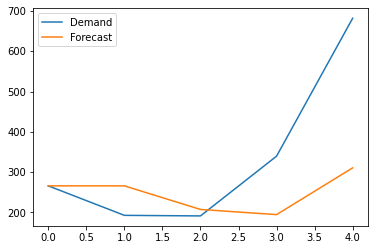

In [67]:
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

5. For interval of 12 month

In [68]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],12)

In [69]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [70]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  4297.310533333331
Mean of Square Errors for alpha = 0.5 is:  5714.030833333331
Mean of Square Errors for alpha = 0.8 is:  7439.204533333331


alpha:  0.2


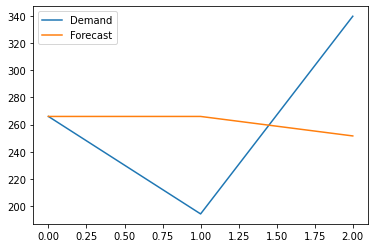

In [71]:
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

6. For interval of 24 month

In [72]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],24)

In [73]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d2_ses_1=ses(demand,alpha1)
forecast_d2_ses_2=ses(demand,alpha2)
forecast_d2_ses_3=ses(demand,alpha3)

In [74]:
#Calculating Mean of Square Errors
mse_d2_ses_1=mean_squared_error(demand,forecast_d2_ses_1)
mse_d2_ses_2=mean_squared_error(demand,forecast_d2_ses_2)
mse_d2_ses_3=mean_squared_error(demand,forecast_d2_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d2_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d2_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d2_ses_3)

Mean of Square Errors for alpha = 0.2 is:  2715.8449999999993
Mean of Square Errors for alpha = 0.5 is:  2715.8449999999993
Mean of Square Errors for alpha = 0.8 is:  2715.8449999999993


alpha:  0.2


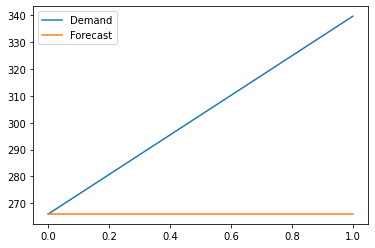

In [75]:
d2_ses_1={'Demand':demand,'Forecast':forecast_d2_ses_1}
d2_ses_2={'Demand':demand,'Forecast':forecast_d2_ses_2}
d2_ses_3={'Demand':demand,'Forecast':forecast_d2_ses_3}

df1=pd.DataFrame(d2_ses_1)
df2=pd.DataFrame(d2_ses_2)
df3=pd.DataFrame(d2_ses_3)

if mse_d2_ses_1<=mse_d2_ses_2 and mse_d2_ses_1<=mse_d2_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d2_ses_2<=mse_d2_ses_1 and mse_d2_ses_2<=mse_d2_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])



---



Tabulating Intervals and least MSE

In [143]:
from tabulate import tabulate
print(tabulate([['1 month', 7001.245732106936], ['2 month', 6880.77763710381],['4 month', 12774.84192750033],['8 month', 32908.912848511995],['12 month', 4297.310533333331],['24 month', 2715.8449999999993]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 month     |     7001.25 |
+-------------+-------------+
| 2 month     |     6880.78 |
+-------------+-------------+
| 4 month     |    12774.8  |
+-------------+-------------+
| 8 month     |    32908.9  |
+-------------+-------------+
| 12 month    |     4297.31 |
+-------------+-------------+
| 24 month    |     2715.84 |
+-------------+-------------+


Plotting MSE for Constructed Table

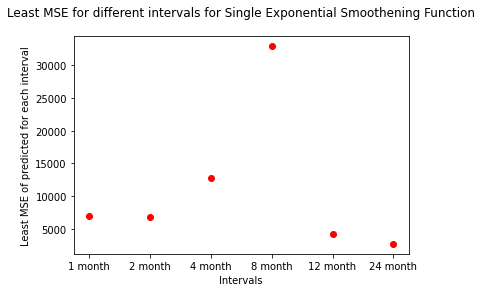

In [145]:
import matplotlib.pyplot as plt
plt.scatter(['1 month','2 month','4 month','8 month','12 month','24 month'], [7001.25, 6880.78,12774.8,32908.9,4297.31,2715.84],c='r')
plt.title('Least MSE for different intervals for Single Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---






For Double Exponential Smoothening


1. For interval of 1 month

In [82]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [83]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [84]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  5654.4471403397865
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  8150.740235092144
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  17610.337587153404


alpha:  0.2
beta:  0.3


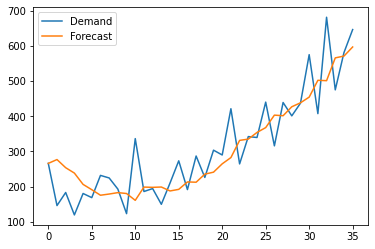

In [85]:
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

2. For interval of 2 month

In [86]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],2)

In [87]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [88]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  12135.859514695057
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  7116.866005519517
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  10360.307208357472


alpha:  0.5
beta:  0.6


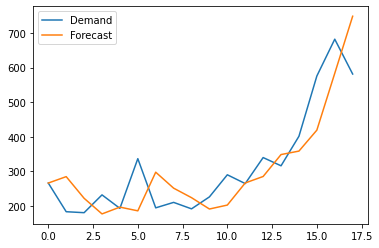

In [89]:
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

3. For interval of 4 month

In [90]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],4)

In [91]:
4#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [92]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  19676.988093930686
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  12204.916099023323
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  8548.9787530965


alpha:  0.8
beta:  0.9


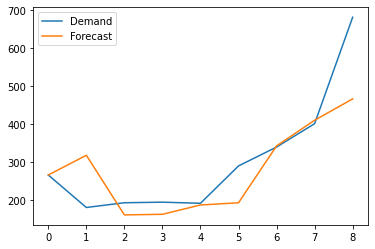

In [93]:
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

4. For interval of 8 month

In [94]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],8)

In [95]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [96]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  26426.46368184635
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  35368.46196403201
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  28664.570879174913


alpha:  0.2
beta:  0.3


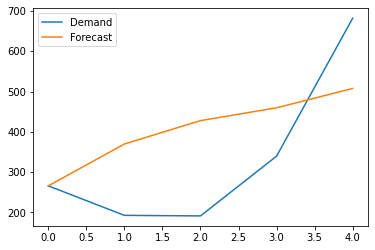

In [97]:
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

5. For interval of 12 month

In [98]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],12)

In [99]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [100]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  4193.213409666667
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  6441.429366666666
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  13002.260838666662


alpha:  0.2
beta:  0.3


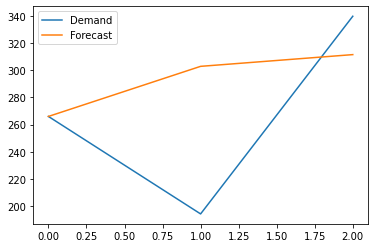

In [101]:
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

6. For interval of 24 month

In [148]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],24)

In [150]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d2_des_1=des(demand,alpha1,beta1)
forecast_d2_des_2=des(demand,alpha2,beta2)
forecast_d2_des_3=des(demand,alpha3,beta3)

In [151]:
#Calculating Mean of Square Errors
mse_d2_des_1=mean_squared_error(demand,forecast_d2_des_1)
mse_d2_des_2=mean_squared_error(demand,forecast_d2_des_2)
mse_d2_des_3=mean_squared_error(demand,forecast_d2_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d2_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d2_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d2_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  0.0
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  0.0
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  0.0


alpha:  0.2
beta:  0.3


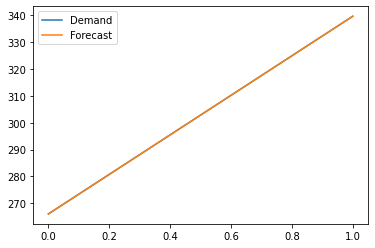

In [152]:
d2_des_1={'Demand':demand,'Forecast':forecast_d2_des_1}
d2_des_2={'Demand':demand,'Forecast':forecast_d2_des_2}
d2_des_3={'Demand':demand,'Forecast':forecast_d2_des_3}

df1=pd.DataFrame(d2_des_1)
df2=pd.DataFrame(d2_des_2)
df3=pd.DataFrame(d2_des_3)

if mse_d2_des_1<=mse_d2_des_2 and mse_d2_des_1<=mse_d2_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot()
elif mse_d2_des_2<=mse_d2_des_1 and mse_d2_des_2<=mse_d2_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])



---



Tabulating Intervals and least MSE

In [153]:
from tabulate import tabulate
print(tabulate([['1 month',  5654.4471403397865], ['2 month',  7116.866005519517],['4 month',  8548.978753096],['8 month', 26426.46368184635],['12 month', 4193.213409666667],['24 month', 0.0]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 month     |     5654.45 |
+-------------+-------------+
| 2 month     |     7116.87 |
+-------------+-------------+
| 4 month     |     8548.98 |
+-------------+-------------+
| 8 month     |    26426.5  |
+-------------+-------------+
| 12 month    |     4193.21 |
+-------------+-------------+
| 24 month    |        0    |
+-------------+-------------+


Plotting MSE for Constructed Table

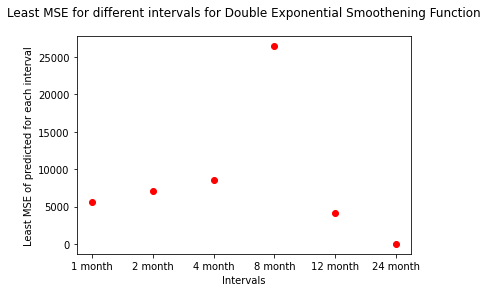

In [154]:
import matplotlib.pyplot as plt
plt.scatter(['1 month','2 month','4 month','8 month','12 month','24 month'], [5654.45 ,7116.87 ,8548.98 ,26426.5  , 4193.21 ,0],c='r')
plt.title('Least MSE for different intervals for Double Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---



For Triple Exponential Smoothening

1. For interval of 1 month

In [112]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [113]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 12 months here

forecast_d2_tes_1=tes(demand,12,alpha1,beta1,gamma1,0)
forecast_d2_tes_2=tes(demand,12,alpha2,beta2,gamma2,0)
forecast_d2_tes_3=tes(demand,12,alpha3,beta3,gamma3,0)

In [114]:
mse_d2_tes_1=mean_squared_error(demand,forecast_d2_tes_1)
mse_d2_tes_2=mean_squared_error(demand,forecast_d2_tes_2)
mse_d2_tes_3=mean_squared_error(demand,forecast_d2_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d2_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d2_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d2_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  1705.5940793672862
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  527.7554251944694
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  3940.441345408781


alpha:  0.5
beta:  0.6
gamma:  0.7


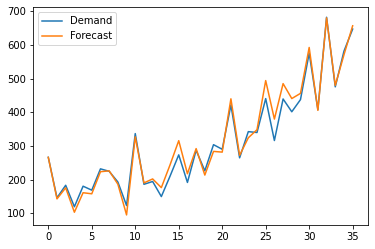

In [115]:
d2_tes_1={'Demand':demand,'Forecast':forecast_d2_tes_1}
d2_tes_2={'Demand':demand,'Forecast':forecast_d2_tes_2}
d2_tes_3={'Demand':demand,'Forecast':forecast_d2_tes_3}

df1=pd.DataFrame(d2_tes_1)
df2=pd.DataFrame(d2_tes_2)
df3=pd.DataFrame(d2_tes_3)

if mse_d2_tes_1<=mse_d2_tes_2 and mse_d2_tes_1<=mse_d2_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d2_tes_2<=mse_d2_tes_1 and mse_d2_tes_2<=mse_d2_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])

For the intervals 2 months, 4 months, 8 months, 12 months, 24 months and 48 months, the triple exponential smoothening defined by me is not giving output since I have taken the season length to be 12 months. Thus while applying the triple exponential smoothening, the index is going out of bound.


---



Tabulating Intervals and least MSE

In [155]:
from tabulate import tabulate
print(tabulate([['1 month', 527.7554251944694]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 month     |     527.755 |
+-------------+-------------+


Plotting MSE for Constructed Table

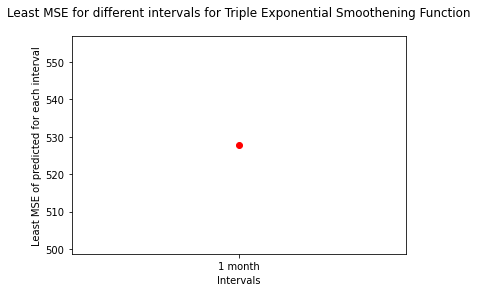

In [156]:
import matplotlib.pyplot as plt
plt.scatter(['1 month'], [527.755],c='r')
plt.title('Least MSE for different intervals for Triple Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---

---

---







**Forecasting with inbuilt function**

In [127]:
data_for_inbuilt=pd.read_csv('D2.csv')

Forecast for Single Exponential Smoothening

In [128]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data_for_inbuilt['SES']=SimpleExpSmoothing(data_for_inbuilt['Sales of shampoo over a three year period']).fit(smoothing_level=0.8,optimized=False).fittedvalues.shift(0)
data_for_inbuilt

,Year,Sales of shampoo over a three year period,SES
0,1,266.0,266.000000
1,2,145.9,266.000000
2,3,183.1,169.920000
3,4,119.3,180.464000
4,5,180.3,131.532800
5,6,168.5,170.546560
6,7,231.8,168.909312
7,8,224.5,219.221862
8,9,192.8,223.444372
9,10,122.9,198.928874


Comparing between my implementation and inbuilt function output

In [129]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Sales of shampoo over a three year period'],1)

In [130]:
#Forecasting
alpha=0.8
forecast_d2_ses=ses(demand,alpha)

In [131]:
my_mse=mean_squared_error(demand,forecast_d2_ses)
inbuilt_mse=mean_squared_error(data_for_inbuilt['Sales of shampoo over a three year period'],data_for_inbuilt.SES)

In [132]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  0.0 %


Forecast for Double Exponential Smoothening

In [133]:
from statsmodels.tsa.holtwinters import Holt

data_for_inbuilt['DES'] = Holt(data_for_inbuilt['Sales of shampoo over a three year period']).fit(smoothing_level=0.2, smoothing_slope=0.3).fittedvalues.shift(0)

data_for_inbuilt

,Year,Sales of shampoo over a three year period,SES,DES
0,1,266.0,266.000000,266.000000
1,2,145.9,266.000000,266.000000
2,3,183.1,169.920000,234.774000
3,4,119.3,180.464000,214.132760
4,5,180.3,131.532800,179.169802
5,6,168.5,170.546560,163.467248
6,7,231.8,168.909312,148.847170
7,8,224.5,219.221862,154.788277
8,9,192.8,223.444372,162.263866
9,10,122.9,198.928874,163.736506


Comparing between my implementation and inbuilt function output

In [134]:
#Forecasting
alpha=0.2
beta=0.3
forecast_d2_des=des(demand,alpha,beta)

In [135]:
my_mse=mean_squared_error(demand,forecast_d2_des)
inbuilt_mse=mean_squared_error(data_for_inbuilt['Sales of shampoo over a three year period'],data_for_inbuilt.DES)

In [136]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  -2.003351073144138 %


Forecast for Triple Exponential Smoothening

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data_for_inbuilt['TES'] = ExponentialSmoothing(data_for_inbuilt['Sales of shampoo over a three year period']).fit(smoothing_level=0.5, smoothing_slope=0.6,smoothing_seasonal=0.7).fittedvalues.shift(0)
data_for_inbuilt


,Year,Sales of shampoo over a three year period,SES,DES,TES
0,1,266.0,266.000000,266.000000,211.527153
1,2,145.9,266.000000,266.000000,238.763577
2,3,183.1,169.920000,234.774000,192.331788
3,4,119.3,180.464000,214.132760,187.715894
4,5,180.3,131.532800,179.169802,153.507947
5,6,168.5,170.546560,163.467248,166.903974
6,7,231.8,168.909312,148.847170,167.701987
7,8,224.5,219.221862,154.788277,199.750993
8,9,192.8,223.444372,162.263866,212.125497
9,10,122.9,198.928874,163.736506,202.462748


Comparing between my implementation and inbuilt function output

In [140]:
#Forecasting
alpha=0.5
beta=0.6
gamma=0.7
forecast_d2_tes=tes(demand,12,alpha,beta,gamma,0)

In [141]:
my_mse=mean_squared_error(demand,forecast_d2_tes)
inbuilt_mse=mean_squared_error(data_for_inbuilt['Sales of shampoo over a three year period'],data_for_inbuilt.TES)

In [142]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  92.34176557502155 %
